# <center> ANALYSIS ON LAYOFFS IN COMPNAY </center>

## AIM :

To know the reasons of layoffs in different company and different locations

#### Required Libraries to be imported

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the data from csv file

In [2]:
df=pd.read_csv("G:\datascience\layoffs_data.csv")

#### Will print the few top rows of the data

In [4]:
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,IRL,SF Bay Area,Consumer,1.00,2023-06-23,https://www.theinformation.com/articles/social...,197.0,Series C,2023-06-25 23:04:16,United States,NaN,Unknown
1,Retool,SF Bay Area,Other,0.09,2023-06-22,Internal memo,141.0,Series C,2023-06-22 14:23:40,United States,NaN,Unknown
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,https://nypost.com/2023/06/23/software-giant-a...,300.0,Acquired,2023-06-24 03:48:00,United States,300.0,Unknown
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-of...,25200.0,Post-IPO,2023-06-22 00:19:03,United States,200.0,Unknown
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.0,Series C,2023-06-23 15:38:59,United States,75.0,Unknown


#### Size if the data

In [5]:
df.shape

(2738, 12)

#### To print the basic information of the data

In [4]:
df.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

## Data Preprocessing

#### Let us check for any missing values


In [7]:
df.isna().sum()

Company                         0
Location_HQ                     0
Industry                        0
Percentage                    919
Date                            0
Source                          0
Funds_Raised                  272
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                867
List_of_Employees_Laid_Off      1
dtype: int64

In [8]:
df.nunique()

Company                       2132
Location_HQ                    215
Industry                        29
Percentage                      77
Date                           574
Source                        2528
Funds_Raised                   669
Stage                           16
Date_Added                    2699
Country                         62
Laid_Off_Count                 310
List_of_Employees_Laid_Off     119
dtype: int64

In [9]:
df['Percentage']=df['Percentage'].fillna(0.2652817482133039)

In [10]:
df['Percentage'].unique()

array([1.        , 0.09      , 0.26528175, 0.4       , 0.11      ,
       0.2       , 0.8       , 0.33      , 0.6       , 0.9       ,
       0.07      , 0.24      , 0.18      , 0.15      , 0.12      ,
       0.04      , 0.35      , 0.1       , 0.08      , 0.05      ,
       0.27      , 0.02      , 0.03      , 0.7       , 0.19      ,
       0.25      , 0.3       , 0.16      , 0.14      , 0.26      ,
       0.85      , 0.23      , 0.06      , 0.28      , 0.13      ,
       0.29      , 0.5       , 0.22      , 0.17      , 0.37      ,
       0.92      , 0.45      , 0.75      , 0.21      , 0.32      ,
       0.57      , 0.31      , 0.7       , 0.72      , 0.35      ,
       0.65      , 0.43      , 0.39      , 0.57      , 0.36      ,
       0.115     , 0.125     , 0.34      , 0.38      , 0.48      ,
       0.01      , 0.82      , 0.42      , 0.54      , 0.46      ,
       0.96      , 0.035     , 0.        , 0.55      , 0.67      ,
       0.95      , 0.054     , 0.0185    , 0.49      , 0.44   

In [11]:
df['Percentage'].mean()

0.26528174821330025

In [12]:
df.isna().sum()

Company                         0
Location_HQ                     0
Industry                        0
Percentage                      0
Date                            0
Source                          0
Funds_Raised                  272
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                867
List_of_Employees_Laid_Off      1
dtype: int64

In [13]:
df['Funds_Raised'].mean()

805.9941182076236

In [14]:
df['Funds_Raised']=df['Funds_Raised'].fillna(805.9941182076236)

In [15]:
df.isna().sum()

Company                         0
Location_HQ                     0
Industry                        0
Percentage                      0
Date                            0
Source                          0
Funds_Raised                    0
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                867
List_of_Employees_Laid_Off      1
dtype: int64

In [16]:
df['Laid_Off_Count'].mean()

252.40566541956173

In [17]:
df['Laid_Off_Count']=df['Laid_Off_Count'].fillna('NaN')

In [18]:
df.isna().sum()

Company                       0
Location_HQ                   0
Industry                      0
Percentage                    0
Date                          0
Source                        0
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
Laid_Off_Count                0
List_of_Employees_Laid_Off    1
dtype: int64

In [19]:
df['List_of_Employees_Laid_Off']=df['List_of_Employees_Laid_Off'].fillna('unknown')

In [20]:
df.isna().sum()

Company                       0
Location_HQ                   0
Industry                      0
Percentage                    0
Date                          0
Source                        0
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
Laid_Off_Count                0
List_of_Employees_Laid_Off    0
dtype: int64

## EDA

#### Q1.Industries That have raised the highest Funds

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

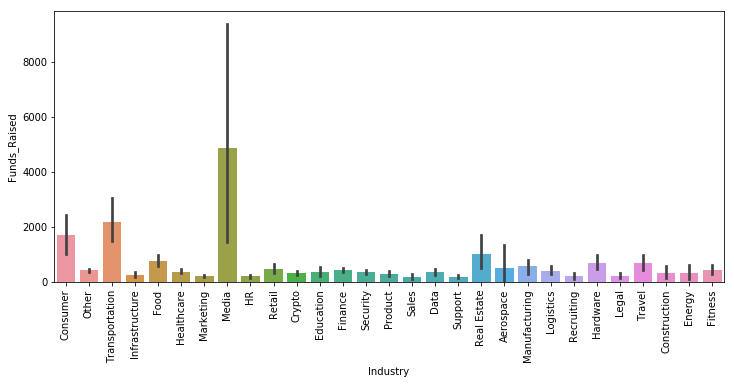

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x="Industry",y='Funds_Raised')
plt.xticks(rotation=90)

### Observation:
#### Media Industry has raised the highest funds

#### Q2:In which country there are most head quarters

In [6]:
df['Location_HQ'].shape

(2738,)

In [7]:
Location=df.groupby(['Location_HQ']).size()
Location=Location.sort_values(ascending=False)

In [8]:
Location.head(20)

Location_HQ
SF Bay Area        691
New York City      284
Boston             123
Los Angeles        105
Bengaluru          105
Seattle             93
London              89
Berlin              67
Sao Paulo           66
Toronto             64
Tel Aviv            63
Austin              44
Sydney              43
Singapore           40
Chicago             39
Mumbai              29
Jakarta             28
Salt Lake City      25
Washington D.C.     25
Gurugram            23
dtype: int64

In [10]:
Location.head(20).plot(kind='bar',figsize=(12,6),color=sns.color_palette())

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

### Observation
#### San Francisco Bay Area has the highest Head Quarters


#### Q3:what are the number stages in the dataset?

Text(0.5, 1.0, 'The number of Stages in the Dataset')

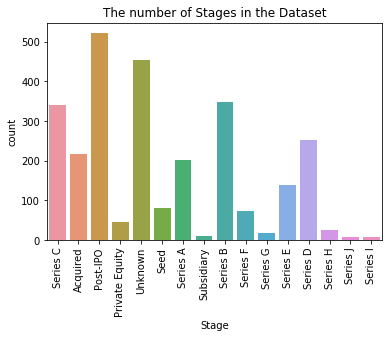

In [30]:
sns.countplot(data=df,x='Stage')
plt.xticks(rotation=90)
plt.title("The number of Stages in the Dataset")

### Observation:
#### Post -IPO is highest stage in the dataset
##### IPO stands for Initial Public Offering


#### Q4:what are the company stages in the dataset?

Text(0.5, 1.0, 'The number of Stages in the Dataset')

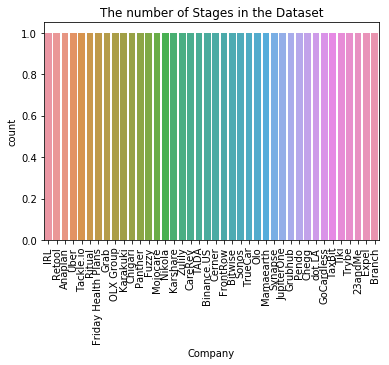

In [31]:
sns.countplot(data=df,x=df['Company'].head(40))
plt.xticks(rotation=90)
plt.title("The number of Stages in the Dataset")